In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

## Understanding Data

In [2]:
# Load Data
with open('20241212_122450.json', 'r') as file:
    data = json.load(file)

In [3]:
# Visualize the first session
first_session = data[0]
print(first_session)

{'GameID': 'Game1-20241212_122704', 'GamemodeName': 'Accumulator Mode', 'ExitedEarly': False, 'Duration': 60.00663375854492, 'PressData': [{'TimeStamp': 4.715271472930908, 'ReactionTime': 1.7088470458984375, 'HandUsed': 'right', 'CorrectPress': True, 'ControllerTrajectory': [{'timeStamp': 3.006422758102417, 'position': {'x': -0.14852076768875122, 'y': -0.12222480773925781, 'z': -0.5681443214416504}}, {'timeStamp': 3.214923858642578, 'position': {'x': -0.14812171459197998, 'y': -0.12243318557739258, 'z': -0.5685713291168213}}, {'timeStamp': 3.4094936847686768, 'position': {'x': -0.14935708045959473, 'y': -0.122292160987854, 'z': -0.5679110288619995}}, {'timeStamp': 3.617784261703491, 'position': {'x': -0.08915591239929199, 'y': -0.08856809139251709, 'z': -0.4508204460144043}}, {'timeStamp': 3.812483549118042, 'position': {'x': -0.04850912094116211, 'y': -0.01698404550552368, 'z': -0.22043323516845703}}, {'timeStamp': 4.006938457489014, 'position': {'x': -0.07202494144439697, 'y': -0.022

In [4]:
# Check the first session structure
print(list(first_session.keys()))

['GameID', 'GamemodeName', 'ExitedEarly', 'Duration', 'PressData', 'HeartrateData']


In [5]:
# The first session overview
# Print session overview
print("=== The First Session Overview ===")
print(f"Game Mode: {first_session['GamemodeName']}")
print(f"Duration: {first_session['Duration']:.1f}s")
print(f"Total Presses: {len(first_session['PressData'])}")
print(f"Total HR Measurements: {len(first_session['HeartrateData'])}")

=== The First Session Overview ===
Game Mode: Accumulator Mode
Duration: 60.0s
Total Presses: 19
Total HR Measurements: 123


In [6]:
# Using dataframe to analyse the first session
# Press Data
first_press_df = pd.DataFrame([{
    'TimeStamp': press['TimeStamp'],
    'ReactionTime': press['ReactionTime'],
    'HandUsed': press['HandUsed'],
    'CorrectPress': press['CorrectPress']
} for press in first_session['PressData']])

# Heart Rate Data
first_hr_df = pd.DataFrame([{
    'TimeStamp': hr['TimeStamp'],
    'HeartRate': hr['Heartrate']
} for hr in first_session['HeartrateData']])


In [7]:
# Display the first five presses on the first session
first_press_df.head()

,TimeStamp,ReactionTime,HandUsed,CorrectPress
0,4.715271,1.708847,right,True
1,7.035147,0.819733,left,True
2,8.673909,1.138733,right,True
3,13.298029,1.624756,left,True
4,16.367163,1.569656,right,True


In [8]:
first_hr_df.head()

,TimeStamp,HeartRate
0,0.000000,88.0
1,0.000000,88.0
2,0.670127,88.0
3,1.186410,89.0
4,1.658510,89.0


## Data Preprocessing

## Check Data Info

In [9]:
# Check Data Info
print(f"Total number of game sessions: {len(data)}")

# Each session with order number and detailed analysis
for session_order, session in enumerate(data, 1):
    # Calculate accuracy
    correct_presses = sum(1 for press in session['PressData'] if press['CorrectPress'])
    accuracy = correct_presses / len(session['PressData']) if len(session['PressData']) > 0 else 0
    
    # Calculate average heart rate
    avg_heart_rate = (sum(hr['Heartrate'] for hr in session['HeartrateData']) / len(session['HeartrateData'])) \
        if session['HeartrateData'] else 0
    
    print(f"\nSession {session_order}")
    print(f"Game Mode: {session['GamemodeName']}")
    print(f"- Duration: {session['Duration']:.2f} s")
    print(f"- Number of presses: {len(session['PressData'])}")
    print(f"- Correct presses: {correct_presses}")
    print(f"- Accuracy: {accuracy:.2%}")
    print(f"- Number of heartrate measurements: {len(session['HeartrateData'])}")
    print(f"- Average heart rate: {avg_heart_rate:.2f} bpm")

Total number of game sessions: 2

Session 1
Game Mode: Accumulator Mode
- Duration: 60.01 s
- Number of presses: 19
- Correct presses: 17
- Accuracy: 89.47%
- Number of heartrate measurements: 123
- Average heart rate: 95.16 bpm

Session 2
Game Mode: Sequence Mode
- Duration: 237.85 s
- Number of presses: 59
- Correct presses: 58
- Accuracy: 98.31%
- Number of heartrate measurements: 575
- Average heart rate: 88.23 bpm


In [10]:
# Create DataFrame for press data
press_data = []
for session_number, session in enumerate(data, 1):
    for press in session['PressData']:
        press_data.append({
            'SessionNumber': session_number,
            'GameMode': session['GamemodeName'],
            'TimeStamp': press['TimeStamp'],
            'ReactionTime': press['ReactionTime'],
            'HandUsed': press['HandUsed'],
            'CorrectPress': press['CorrectPress']
        })
press_df = pd.DataFrame(press_data)
press_df

,SessionNumber,GameMode,TimeStamp,ReactionTime,HandUsed,CorrectPress
0,1,Accumulator Mode,4.715271,1.708847,right,True
1,1,Accumulator Mode,7.035147,0.819733,left,True
2,1,Accumulator Mode,8.673909,1.138733,right,True
3,1,Accumulator Mode,13.298029,1.624756,left,True
4,1,Accumulator Mode,16.367163,1.569656,right,True
...,...,...,...,...,...,...
73,2,Sequence Mode,223.490417,6.926910,right,True
74,2,Sequence Mode,227.961029,2.942627,right,True
75,2,Sequence Mode,231.029022,6.010590,right,True
76,2,Sequence Mode,232.569977,7.551575,right,True


In [11]:
# Create DataFrame for heart rate data
heartrate_data = []
for session_number, session in enumerate(data, 1):
    for hr_measurement in session['HeartrateData']:
        heartrate_data.append({
            'SessionNumber': session_number,
            'GameMode': session['GamemodeName'],
            'TimeStamp': hr_measurement['TimeStamp'],
            'HeartRate': hr_measurement['Heartrate']
        })
heartrate_df = pd.DataFrame(heartrate_data)
heartrate_df

,SessionNumber,GameMode,TimeStamp,HeartRate
0,1,Accumulator Mode,0.000000,88.0
1,1,Accumulator Mode,0.000000,88.0
2,1,Accumulator Mode,0.670127,88.0
3,1,Accumulator Mode,1.186410,89.0
4,1,Accumulator Mode,1.658510,89.0
...,...,...,...,...
693,2,Sequence Mode,237.846558,86.0
694,2,Sequence Mode,237.846558,86.0
695,2,Sequence Mode,237.846558,86.0
696,2,Sequence Mode,237.846558,86.0


In [12]:
# Accuracy Analysis
print("\nDetailed Accuracy Analysis:")
accuracy_by_mode = press_df.groupby('GameMode')['CorrectPress'].agg([
    ('Total Presses', 'count'),
    ('Correct Presses', 'sum'),
    ('Accuracy Rate', 'mean')
])
accuracy_by_mode['Accuracy Percentage'] = (accuracy_by_mode['Accuracy Rate'] * 100).round(2)
accuracy_by_mode


Detailed Accuracy Analysis:


,Total Presses,Correct Presses,Accuracy Rate,Accuracy Percentage
GameMode,,,,
Accumulator Mode,19,17,0.894737,89.47
Sequence Mode,59,58,0.983051,98.31


In [13]:
# Hand Usage Analysis
print("\nHand Usage Analysis:")
hand_usage = press_df.groupby(['GameMode', 'HandUsed']).size().unstack(fill_value=0)
hand_usage['Total'] = hand_usage.sum(axis=1)
hand_usage['Percentage Left'] = (hand_usage['left'] / hand_usage['Total'] * 100).round(2)
hand_usage['Percentage Right'] = (hand_usage['right'] / hand_usage['Total'] * 100).round(2)
hand_usage


Hand Usage Analysis:


HandUsed,left,right,Total,Percentage Left,Percentage Right
GameMode,,,,,
Accumulator Mode,2,17,19,10.53,89.47
Sequence Mode,4,55,59,6.78,93.22


## Data Visualization

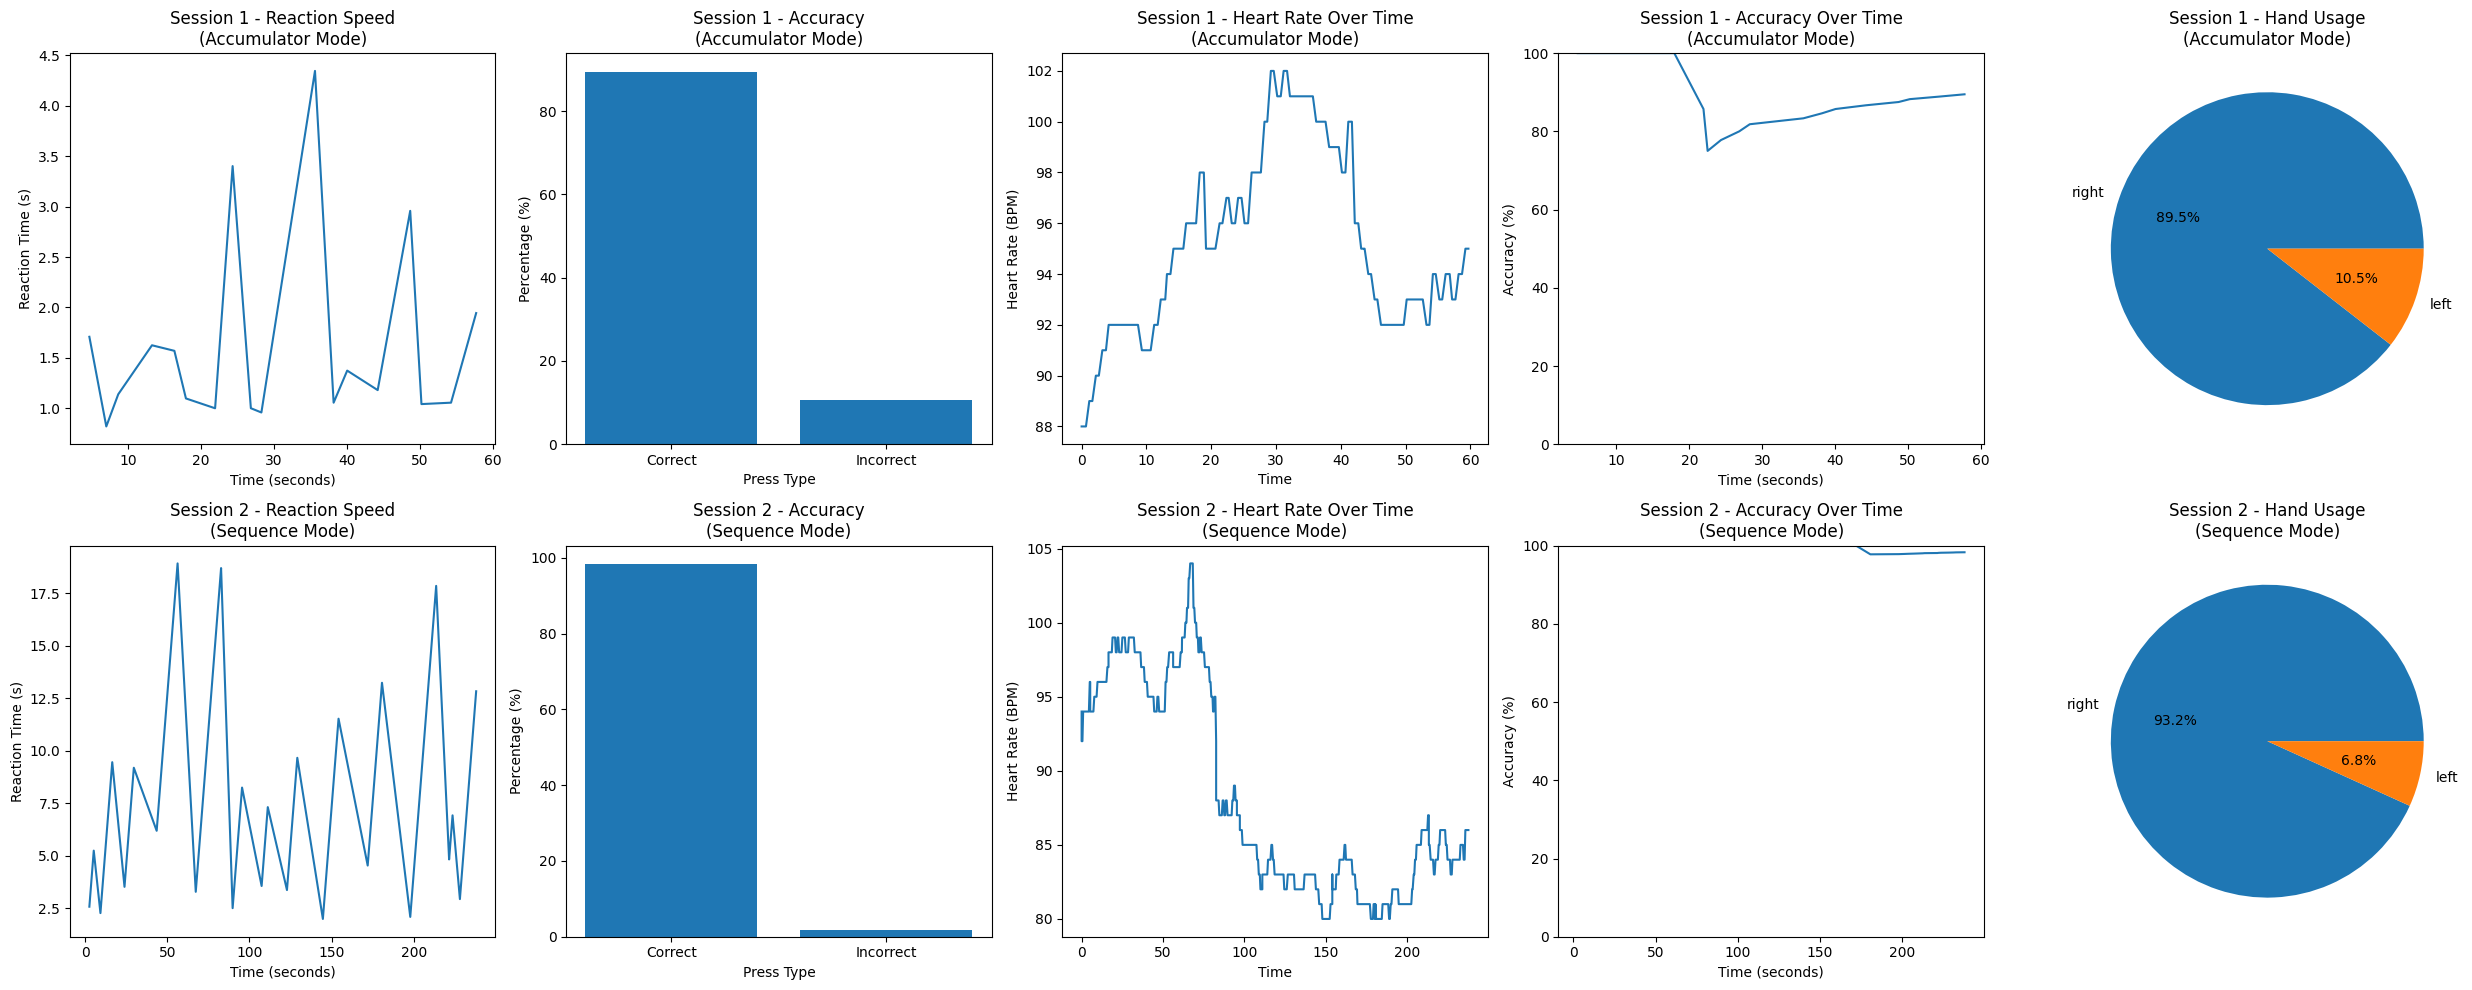

In [17]:
# Get unique session numbers
unique_sessions = press_df['SessionNumber'].unique()

# Create visualization function
def create_session_visualization():
   # Calculate number of subplots needed
   num_sessions = len(unique_sessions)
   
   # Create figure
   fig, axes = plt.subplots(num_sessions, 5, figsize=(25, 5*num_sessions))
   
   # Iterate through each session
   for session_idx, session_number in enumerate(unique_sessions):
       # Current session data
       session_press_df = press_df[press_df['SessionNumber'] == session_number]
       session_heartrate_df = heartrate_df[heartrate_df['SessionNumber'] == session_number]
       
       # Get game mode for current session
       game_mode = session_press_df['GameMode'].iloc[0]
       
       # 1. Reaction Speed Over Time Line Plot
       # Sort by timestamp
       session_press_sorted = session_press_df.sort_values('TimeStamp')

       axes[session_idx, 0].plot(
           session_press_sorted['TimeStamp'], 
           session_press_sorted['ReactionTime']
       )
       axes[session_idx, 0].set_title(f'Session {session_number} - Reaction Speed\n({game_mode})')
       axes[session_idx, 0].set_xlabel('Time (seconds)')
       axes[session_idx, 0].set_ylabel('Reaction Time (s)')
       
       # 2. Accuracy Bar Chart
       accuracy_data = session_press_df['CorrectPress'].value_counts(normalize=True) * 100
       axes[session_idx, 1].bar(accuracy_data.index.map({True: 'Correct', False: 'Incorrect'}), 
                                 accuracy_data.values)
       axes[session_idx, 1].set_title(f'Session {session_number} - Accuracy\n({game_mode})')
       axes[session_idx, 1].set_xlabel('Press Type')
       axes[session_idx, 1].set_ylabel('Percentage (%)')
       
       # 3. Heart Rate Line Plot
       axes[session_idx, 2].plot(session_heartrate_df['TimeStamp'], session_heartrate_df['HeartRate'])
       axes[session_idx, 2].set_title(f'Session {session_number} - Heart Rate Over Time\n({game_mode})')
       axes[session_idx, 2].set_xlabel('Time')
       axes[session_idx, 2].set_ylabel('Heart Rate (BPM)')
       
       # 4. Accuracy Over Time Line Plot
       # Sort by timestamp
       session_press_sorted = session_press_df.sort_values('TimeStamp')
       
       # Calculate cumulative accuracy (percentage)
       session_press_sorted['CumulativeAccuracy'] = (
           session_press_sorted['CorrectPress'].cumsum() / 
           (np.arange(len(session_press_sorted)) + 1)
       ) * 100  
       
       axes[session_idx, 3].plot(
           session_press_sorted['TimeStamp'], 
           session_press_sorted['CumulativeAccuracy']
       )
       axes[session_idx, 3].set_title(f'Session {session_number} - Accuracy Over Time\n({game_mode})')
       axes[session_idx, 3].set_xlabel('Time (seconds)')
       axes[session_idx, 3].set_ylabel('Accuracy (%)')
       axes[session_idx, 3].set_ylim(0, 100)  
            
       # 5. Hand Usage Pie Chart
       hand_usage = session_press_df['HandUsed'].value_counts()
       axes[session_idx, 4].pie(hand_usage, labels=hand_usage.index, autopct='%1.1f%%')
       axes[session_idx, 4].set_title(f'Session {session_number} - Hand Usage\n({game_mode})')
   
   plt.tight_layout()
   plt.show()

# Call visualization function
create_session_visualization()

## Game Mode Comparsion

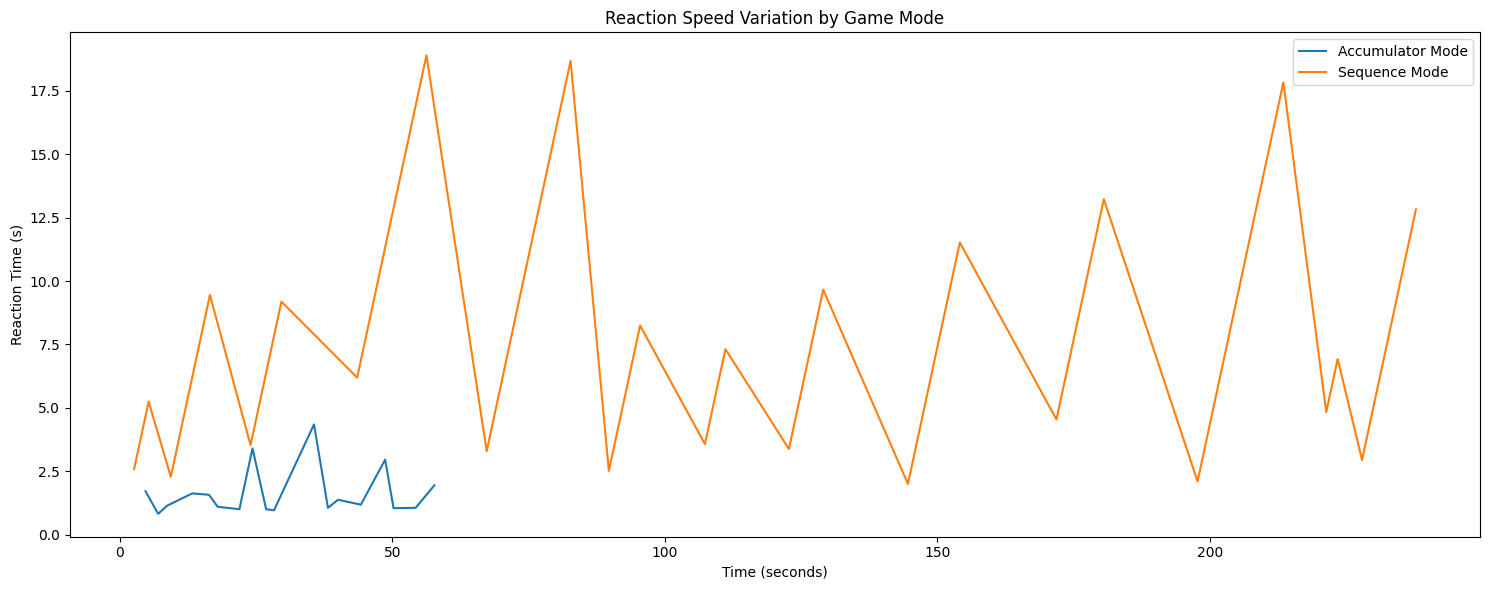

In [23]:
def visualize_reaction_time_by_mode(press_df):
   # Get unique game modes
   game_modes = press_df['GameMode'].unique()
   
   # Create figure
   plt.figure(figsize=(15, 6))
   
   # Plot reaction time over time for each game mode
   for mode in game_modes:
       # Filter data for current game mode
       mode_data = press_df[press_df['GameMode'] == mode].sort_values('TimeStamp')
       
       plt.plot(mode_data['TimeStamp'], mode_data['ReactionTime'], label=mode)
   
   plt.title('Reaction Speed Variation by Game Mode')
   plt.xlabel('Time (seconds)')
   plt.ylabel('Reaction Time (s)')
   plt.legend()
   plt.tight_layout()
   plt.show()

visualize_reaction_time_by_mode(press_df)